# Online News Popularity
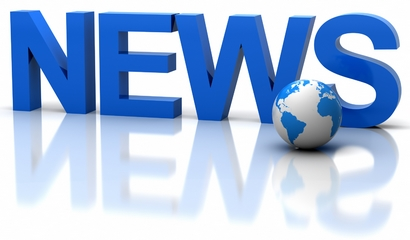
Dieses Notebook beschäftigt sich mit der Popularität von Online Nachrichten in Sozialen Medien. 
Im Detail wird die Reichweite dieser Nachrichten betrachtet.
Ein Maß dafür bieten die so genannten `shares` in den Sozialen Medien. Diese geben einen numerischen Wert an, wie oft eine Meldung geteilt bzw. weitergeleitet wurde. 

## Datensatz
Dieser Datensatz umfasst einen heterogenen Satz an Merkmalen von Nachrichtenartikeln vom Online Nachrichtenprotal www.mashable.com, welche in einem Zeitraum von zwei Jahren veröffentlich wurden.

Quelle des Datzensatzen:
http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

### Eigenschaften und Aufbau
Der Datensatz setzt sich aus insgesamt **61 Attributen** zusammen. Davon sind:
- **58** nutzbare Feature Vektoren 
- **2** nicht für die Vorhersage nutzbare Attribute
- **1** Target Vektor

<u>Attribute:</u>

0. url: URL of the article (nicht nutzbar für die Vorhersage)
1. timedelta: Days between the article publication and the dataset acquisition (nicht nutzbar für die Vorhersage)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (Target Vektor)

Der Umfang des Datensatzes beträgt **39797** Artikel.

## Zielstellung
Mit Hilfe von Maschine Learning Verfahren soll eine Möglichkeit geschaffen werden, die Reichtweite für eine Online Nachricht vorhersagen zu können.

### Lösungsansatz
Aus der Idee heraus, dass Nachrichten bzw. Berichterstattungen im Allgemeinen immer wieder auf `popoluär` bzw. `unpopulär` reduziert werden, verfolgt auch dieser Ansatz diese Idee. Das bedeutet konkret, dass zunächst festgelegt wird was in dem hier vorliegendem Datensatz als populär/unpopulär betrachtet werden kann. Danach wird sich hier näher mit den Eingabedaten beschäftigt bevor mit Hilfe von Klassifikationverfahren eine Prognose für die Nachrichten erstellt wird.


## Interpretation und Vergleich der Ergebnisse
Alle Ergebnisse werden am Ende des Notebooks gesammelt und interpretiert.

***

# Vorarbeiten
Für Lösungsansätze wird eine Reihe von Third-Party-Bibliotheken verwendet

In [ ]:
# Sollte es zu Problemen mit der Nutzung von TensorFlow geben, dann ein Downgrade zu 2.3.1 durchführen
#%pip install -U tensorflow==2.3.1

# Sollte dies wieder Erwarten nicht funktionieren dann auch die Abhängigkeiten mit downgraden
#%pip install -U tensorflow==2.3.1 --use-feature=2020-resolver

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

Die Bibliothek Pandas bietet eine Reihe von praktischen Hilfsfunktionen für die Arbeit mit Neuronalen Netzen bzw. deren Datensätzen. Da es eventuell auf der zu Grunde liegenden Jupyter Notebook Installation nicht zur Verfügung steht, wird es bei Bedarf installiert.

In [ ]:
%pip install pandas
import pandas as pd

Zu Beginn der Datenverarbeitung muss der Datensatzes von der abgespeicherten Datei eingelesen werden

In [ ]:
# Einlesen des gesamten Datensatzes
np_ds = pd.read_csv("OnlineNewsPopularity.csv")

# Erstelle Kopie die später für die weitere Datenexploration genutzt wird 
np_ds_copy = np_ds.copy()

# Lösungsansatz
## Datenexploration und -visualisierung
Zunächst ist einmal durch die Beschreibung der Eingabedaten ersichtlich, dass Features dabei sind, die sich nicht für eine Vorhersage eigenen. So wird die **News-URL** und die **Zeitdifferenz zwischen Erstellung/Publikation** aus dem Datensatz ausgeschlossen. 

In [ ]:
np_ds = np_ds.drop([np_ds.keys()[0], np_ds.keys()[1]], axis=1)

Nun wird festgelegt was `populär` bzw. `unpopulär` ist. Dafür wird die Spalte `shares` näher analysiert.

In [ ]:
np_ds[' shares'].describe()

Die Daten zeigen, dass die Hälfte aller Nachrichten - nämlich das 50% Quantil - unterhalb von 1400 `shares` liegt. 75% dagegen liegen immer noch unter 2800 `shares`. Darüber steigen die Zahlen für wenige Nachrichten um ein Vielfaches an.

Nun ist es trotz dieser Zahlen schwierig eine wissenschaftliche Definition zu finden. Daher wird ein naiver Ansatz verwendet und die Nachrichten in 2 gleiche Teile aufgeteilt. Eine Teilung erfolgt somit bei dem **50% Quantil**.

Demnach wird der Featurevektor `shares` nun klassifiziert in:
- 0 = unpoluär
- 1 = pupulär

In [ ]:
np_ds[' shares'] = np.where(np_ds[' shares'] <=1400, 0, 1)
np_ds.head(3)

Nun können die Daten nach Eingabe- und Zieldaten für die weitere Verarbeitung aufteilt werden.

In [ ]:
unpop_ds,pop_ds = np_ds[np_ds[' shares']==0], np_ds[np_ds[' shares']==1]

### Prozess der Featuresauswahl/-reduktion
Im folgenden werden die Eingabefeatures näher analysiert. Darauf aufbauend wird eine Auswahl getroffen, welche Features überhaupt in das weitere Training aufgenommen werden. Dies ist gleichbedeutet mit der Relevanz von Eingabe Features für das Ziel. Die Auswahl von Feature ist aus folgenden Gründen wichtig:
- **Laufzeit des Algorithmus** bei Training und Vorhersage kann stark beschleunigt werden ohne dabei viel Genaugikeit einzubüßen
- **Verringerung von Komplexität** bei der Darstellung und Interpretation von Ergebnissen
- Beim Durchlaufen von verschiedenen Auswahlen und deren Ergebnissen lässt dich die **Feature-Auswahl an sich bewerten**

Bei der Auswahl von Eingaben müssen wir verstehen wie diese mit der Zielvariablen zusammenhängen. Dafür werden kategorisierende und numerische Features separat betrachtet.

Für den Auswahlprozess stehen verschiedene Verfahren zur Verfügung:
- **Manual Tweaking** (manuelle Filtermethode)
- **Variance Method** (mathematische Filtermethode)
- **Pearson Correlation** (mathematische Filtermethode)

#### Manual Tweaking
Bei diesem Verfahren werden häufig Features exkludiert auf Basis von Erfahrung von gleichgearteten Problemen. Da diese Wissen momentan leider nicht zur Verfügung steht, werden die Daten visualisiert, um eine Entscheidung zu treffen.

Zuvor wurde bereits eine manuelle Auswahl getroffen. Die Features für die **URL** und **Zeitdifferenz** wurden bereits ausgeschlossen.
***

**Kategorische Features**

Am Beispiel der Wochentage wird veranschaulicht, wie eine Featureauswahl getroffen werden kann. Dafür wird ein Balkendiagramm erstellt welches die Nachrichtenkategorien pro Wochentag darstellt.

In [ ]:
columns_day = np_ds_copy.columns.values[31:38]
unpop_tag, pop_tag = unpop_ds[columns_day].sum().values, pop_ds[columns_day].sum().values

# plot a bar chart
fig = plt.figure(figsize = (10,5))
plt.title("Anzahl der populären / unpopulären Nachrichten an verschiedenen Wochentagen", fontsize = 12)
plt.grid(alpha=0.4,zorder=0)
plt.bar(np.arange(len(columns_day)), unpop_tag, width = 0.3, align="center", color = 'tab:blue', label = "unpopulär" ,zorder=3)
plt.bar(np.arange(len(columns_day)) - 0.3, pop_tag, width = 0.3, align = "center", color = 'tab:orange',label = "populär" ,zorder=3)
plt.xticks(np.arange(len(columns_day)), labels=('Montag', 'Dienstag','Mittwoch','Donnerstag', 'Freitag','Samstag','Sonntag'))
plt.ylabel("Anzahl Nachrichten", fontsize = 10) 
plt.legend(loc = 'upper right', fontsize = 12)
plt.show()

Die Verteilung der Nachrichten über die Wochenentage zeigt, dass ähnliche viele Meldungen über die Arbeitstage (Montag bis Freitag) publiziert wurden und diese ein ähnliches Verhältnis ihrer Popularität besitzen. Im Gegensatz dazu stehen die Wochentage Samstag und Sonntag, welche widerum untereinander sehr identisch sind, sich jedoch von den Arbeitstagen wesentlich unterscheiden. Aus dieser Interpretation heraus können die konkreten Wochentage aus den Eingabedaten heraus gelassen werden und es wird stattdessen nur das Feature **is_weekend** genutzt.

**Kategorische Features**

Ein weiteres Beispiel wäre die Nachrichtenkategorie. Die folgende Visualisierung zeigt die Verteilung der Nachrichten und deren Populariät.

In [ ]:
columns_katogorie=np_ds_copy.columns.values[13:19]
unpop_kat,pop_kat  = unpop_ds[columns_katogorie].sum().values , pop_ds[columns_katogorie].sum().values

fig = plt.figure(figsize = (10,5))
plt.title("Anzahl populärer / unpopulärer Nachrichten über verschiedene Artikelkategorien", fontsize = 12)
plt.grid(alpha=0.4,zorder=0)
plt.bar(np.arange(len(columns_katogorie)) - 0.3, unpop_kat , width = 0.3, align = "center", color = 'tab:blue', label = "unpopulär",zorder=3)
plt.bar(np.arange(len(columns_katogorie)), pop_kat, width = 0.3, align="center", color = 'tab:orange', label = "populär",zorder=3)
plt.xticks(np.arange(len(columns_katogorie)),labels=('Lifestyle', 'Entertainment','Bus','Socmed', 'Technology','World'))
plt.ylabel("Anzahl", fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

Die Verteilung der Nachrichten zeigt, eine deutliche Ungleichverteilung in Anzahl und Popularität zwischen den Kategorien. So existieren beispielweise in `Social Media` und `Technology` deutlich häufiger populäre als unpopuläre Artikel.

Trotz dieser Ungleichgewichte werden an dieser Stelle <u>keine</u> Nachrichtenkategorien herausgelassen. Es soll eine Vorhersage für das gesamte Nachrichtenportal aller Artikel stattfinden und dies kann nur erfolgen, wenn keine Kategorien ausgeschlossen werden.

**Numerische Features**

Es kann ebenfalls eine manuelle Auswahl bei numerischen Features erfolgen. Für eine solche Auswahl wird nach Ausreißern (Outliers) in den Features gesucht und deren Werteverteilung betrachtet. Ausreißer können das Lernen beeinträchtigen. Allerdings stellen Normalverteilungen der Werte einen guten Start für die Lernverfahren dar. Für die Visualisierung werden Histogramme und Boxplots eingesetzt.

Zunächst wird die Anzahl der Zeichen im Nachrichtentitel `n_tokens_title` untersucht. 

In [ ]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
fig, subs = plt.subplots(1, 3, figsize=(12,5))

# Histogramm
subs[0].hist((np_ds[np_ds[' shares']==0])[' n_tokens_title'].values, alpha=0.5)
subs[0].hist((np_ds[np_ds[' shares']==1])[' n_tokens_title'].values, alpha=0.5)
# Boxplot
subs[1].boxplot((np_ds[np_ds[' shares']==0])[' n_tokens_title'].values,widths=0.3)
labels=('0')
subs[1].set_xticks(np.arange(len(labels)))
subs[1].set_xticklabels(labels)
subs[1].set_title('shares = 0')

subs[2].set_xticks(np.arange(1))
subs[2].set_xticklabels(labels)
subs[2].set_title('shares = 1')
subs[2].boxplot((np_ds[np_ds[' shares']==1])[' n_tokens_title'].values,widths=0.3)
fig.subplots_adjust(left=0.05, right=1,bottom=1,top=2,hspace=0.95,wspace=1)

Für das Feature `n_tokens_title` zeigt das Histogramm eine annähernd normalverteilte Kurve für populäre und unpopuläre Artikel. Auch im Boxplot lassen sich keine wesentlichen Ausreißer festellen. Das bedeutet das dieses Feature für ein Lernverfahren geeignet ist.
***
Im Folgenden werden noch die Features `n_tokens_content` und `n_non_stop_unique_tokens` untersucht.

In [ ]:
fig, subs = plt.subplots(1, 3, figsize=(12,5))
# Histogramm
subs[0].hist((np_ds[np_ds[' shares']==0])[' n_tokens_content'].values, alpha=0.5)
subs[0].hist((np_ds[np_ds[' shares']==1])[' n_tokens_content'].values, alpha=0.5)
# Boxplot
subs[1].boxplot((np_ds[np_ds[' shares']==0])[' n_tokens_content'].values,widths=0.4)
labels=('0')
subs[1].set_xticks(np.arange(len(labels)))
subs[1].set_xticklabels(labels)
subs[1].set_title('shares = 0')

subs[2].set_xticks(np.arange(1))
subs[2].set_xticklabels(labels)
subs[2].set_title('shares = 1')
subs[2].boxplot((np_ds[np_ds[' shares']==1])[' n_tokens_content'].values,widths=0.4)
fig.subplots_adjust(left=0.05, right=1,bottom=1,top=2,hspace=0.95,wspace=1)

In [ ]:
fig, subs = plt.subplots(1, 3, figsize=(12,5))
# Histogramm
subs[0].hist((np_ds[np_ds[' shares']==0])[' n_non_stop_unique_tokens'].values, alpha=0.5)
subs[0].hist((np_ds[np_ds[' shares']==1])[' n_non_stop_unique_tokens'].values, alpha=0.5)
# Boxplot
subs[1].boxplot((np_ds[np_ds[' shares']==0])[' n_non_stop_unique_tokens'].values,widths=0.3)
labels=('0')
subs[1].set_xticks(np.arange(len(labels)))
subs[1].set_xticklabels(labels)
subs[1].set_title('shares = 0')

subs[2].set_xticks(np.arange(1))
subs[2].set_xticklabels(labels)
subs[2].set_title('shares = 1')
subs[2].boxplot((np_ds[np_ds[' shares']==1])[' n_non_stop_unique_tokens'].values,widths=0.3)
fig.subplots_adjust(left=0.05, right=1,bottom=1,top=2,hspace=0.95,wspace=1)



Obwohl `n_tokens_content` Ausreißer zeigt, kann man am Histogramm erneut eine ähnliche Verteilung zwischen beiden Wertemengen ablesen. Mit der nötigen Erfahrung könnte man hier eine bessere Entscheidung treffen, ob dieses Feature nun für das Training mit aufgenommen wird oder nicht.

`n_non_stop_unique_tokens` hingehen zeigt deutlich, dass die Verteilung der Werte in keiner Weise ähnlich ist. Auch befinden sich hier erhebliche Ausreißer, weshalb dieses Feature nicht in das Traing mit aufgenommen werden sollte.

Für die Features `kw_max_max`, `kw_min_avg` und `kw_min_max` werden ebenfalls Boxplots erstellt und auf Basis dieser entschieden ob diese für ein Training geeignet sind.

In [ ]:
axes = np_ds.boxplot(column=[' kw_max_max'], by=[' shares'])
fig = axes.get_figure()
fig.suptitle('')

In [ ]:
axes = np_ds.boxplot(column=[' kw_min_avg'], by=[' shares'])
fig = axes.get_figure()
fig.suptitle('')

In [ ]:
axes = np_ds.boxplot(column=[' kw_min_max'], by=[' shares'])
fig = axes.get_figure()
fig.suptitle('')

______________________________________________________

#### Variance Method
Bei dieser Methode geht es darum, Features zu finden, die eine hohen Varianz besitzen. Aus Diesen können die Lernverfahren mehr `Lernen`, weshalb diese gegenüber anderen Features zu bevorzugen sind.

In [ ]:
# Take Numerical Features from list
numerical_features=np_ds_copy.columns.values[2:13].tolist()+np_ds_copy.columns.values[19:31].tolist()+np_ds_copy.columns.values[39:60].tolist()

# Variance of Numerical Features
np_ds_copy[numerical_features].var().sort_values(ascending=False,inplace=False).plot(kind="bar",figsize=(16,4))

Die Darstellung zeigt absteigend die Features mit der größten Varianz. Anhand der Grafik werden nun `kw_max_max` und `kw_avg_max` für das weitere `Lernen` berücksichtigt.

_______________________________________________________________________________

#### Pearson Correlation
Bei der "Pearson Korrelation" geht es darum Feature-Paare zu finden, welche stark miteinander korrelieren. Solche Features können dem Lernalgorythmus keine zusätzlichen Informationen liefern, weshalb bei korrelierenden Features nur eins verwendet wird. Folgend wird eine Korrelationsmatrix aufgestellt und nach numerischen Zusammenhängen gesucht.

In [ ]:
# note absolute correlation is used here
df=np_ds_copy[numerical_features]
f = plt.figure(figsize=(16, 12))
plt.matshow(abs(df.corr()), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
# create method which can choose strongly correlating values
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# collect feature which correlate at least 85%
corr_features = correlation(df, 0.85)
set(corr_features)

Die so gefundenen Features besitzen ein ähnliches Verhalten, so dass die jeweils zusammengehörenden bis auf eins vermieden werden können. Zum Beispiel `n_non_stop_unique_tokens` und `n_non_stop_words` sind zu mehr als 90% korreliert und eines davon kann vermieden werden.

***
Nach der Datenexploration und -analyse sind die folgenden **27 von 59** Features für das Training ausgewählt worden.

In [ ]:
sel_categorical_attributes=[
             ' data_channel_is_entertainment' ,
             ' data_channel_is_socmed',
             ' data_channel_is_lifestyle',
             ' data_channel_is_bus',
             ' data_channel_is_tech',
             ' data_channel_is_socmed',
             ' data_channel_is_world',
             ' is_weekend',                      
]


sel_numerical_attributes=[
            ' n_tokens_title', 
            ' n_tokens_content',
            ' n_non_stop_unique_tokens',
            ' title_subjectivity',
            ' abs_title_subjectivity',
            ' LDA_02',
            ' LDA_04',
                        
            ' min_negative_polarity',
            ' max_positive_polarity',    
            ' avg_negative_polarity',
            ' self_reference_min_shares',
            ' global_subjectivity',
            ' global_rate_positive_words',
           
            ' rate_positive_words',
            ' kw_min_avg',
            ' kw_avg_max',
            ' num_keywords',
            ' num_imgs', 
            ' num_self_hrefs',
            ]

man_sel_col=sel_categorical_attributes+sel_numerical_attributes
print("Choosen " + str(len(man_sel_col)) + " features.")

## Algorithmus auswählen

Es werden vier Klassifizierungslernalgorithmen implementiert und verglichen, einschließlich
1. **Logistische Regression** : Es ist der einfachste Klassifizierungsalgorithmus und fungiert hier als Benchmark

2. **Adaboost** : AdaBoost kann verwendet werden, um die Leistung eines Algorithmus für maschinelles Lernen zu steigern. Es wird am besten bei schwachen Lernenden (Entscheidungsbäumen) verwendet. AdaBoost ist weniger empfindlich gegenüber Ausreißern

3. **Random Forest** : Der Random Forest-Algorithmus kann sowohl für Klassifizierungen als auch für Regressionsaufgaben verwendet werden.

3. **Multi-layer Perceptron** : Erstellt intern ein Neuronales Netzerk um das vorliegende Problem zu Lernen.

### Normalisierung
Bevor die Algorithmen die ausgewählten Features erhalten, müssen diese zunächst noch normalisiert werden, damit mit ihnen besser gerechnet werden kann.

In [ ]:
scaler = MinMaxScaler()
np_ds[sel_numerical_attributes] = scaler.fit_transform(np_ds[sel_numerical_attributes])
np_ds[man_sel_col].head(3)

### Aufteilen in Trainings- und Testdaten

In [ ]:
X,y = np_ds[man_sel_col], np_ds[' shares']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# visualize train and test set
def func(pct):
    return "{:.1f}%\n[{:d}]".format(pct, int((pct * df.shape[0])/100))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Training', 'Test'
sizes = [X_train.shape[0],  X_test.shape[0]]
explode = (0, 0.06)  # only "explode" the 2nd slice (i.e. 'Test')

fig1, ax1 = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct), shadow=True, startangle=90)

for i in range(len(texts)):
    texts[i].set_fontsize("xx-large")
    autotexts[i].set_fontsize("xx-large")
    autotexts[i].set_color("white")
    autotexts[i].set_fontweight("bold")


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Größe des Trainings- und Test-Sets", fontsize=14)
plt.show()

### Classifiers initialisieren

In [ ]:
results = {}

clf_ADA = AdaBoostClassifier(random_state=0, learning_rate=0.5, n_estimators=300)
clf_LOG = LogisticRegression(random_state=0, solver="sag", C=2.5)
clf_RF = RandomForestClassifier(random_state=0, n_estimators=500)
clf_MLP_NN = MLPClassifier(hidden_layer_sizes=(32,8), solver='adam', random_state=1, max_iter=300)

### Trainieren und Testen

In [ ]:
# Train and Test AdaBoostClassifier
clf_LOG.fit(X_train, y_train)
predictions_test = clf_LOG.predict(X_test)
results['acc_test_clf_LOG'] = accuracy_score(y_test,predictions_test)*100

In [ ]:
# Train and Test LogisticRegression
clf_ADA.fit(X_train, y_train)
predictions_test = clf_ADA.predict(X_test)
results['acc_test_ADA'] = accuracy_score(y_test,predictions_test)*100

In [ ]:
# Train and Test RandomForestClassifier
clf_RF.fit(X_train, y_train)
predictions_test = clf_RF.predict(X_test)
results['acc_test_RF'] = accuracy_score(y_test,predictions_test)*100

In [ ]:
# Train and Test MLPClassifier
clf_MLP_NN.fit(X_train, y_train)
predictions_test = clf_MLP_NN.predict(X_test)
results['acc_test_MLP_NN'] = accuracy_score(y_test,predictions_test)*100

results

## Interpretation der Ergebnisse

1. **Logistic Regression (~63% Genauigkeit)**: Die logistische Regression dient als Basis für die Bewertung der anderen Algorithmen.


2. **ADABoost (~64% Genauigkeit)** : Die Leistung ist geringfügig besser als beim Logistic Regression, da es weniger empfindlich gegenüber Ausreißern ist, obwohl es widerum intern schwache Lernende Verfahren verwendet wie Decision-Tree.


3. **Random-Forest (~65% Genauigkeit)** : Hier konnte die Genauigkeit erneut leicht gesteigert werden, weil in dem Modell zusätzliche Zufälligkeiten hinzufügt worden sind, während die Bäume erstellt werden. Anstatt beim Aufteilen eines Knotens nach dem wichtigsten Merkmal zu suchen, wird nach dem besten Merkmal unter einer zufälligen Teilmenge von Merkmalen gesucht. Dies führt zu einer großen Vielfalt, die im Allgemeinen zu einem besseren Modell führt.


4. **MLPClassifier (~63% Genauigkeit)** : Das MLP liegt nun etwas unter dem vorherigen Algorithmus. Bei diesem sind jedoch die Anpassungsmöglichkeiten deutlich breiter, so dass mit weiteren Experimenten wohl noch ein paar Prozent mehr möglich wären.

**Vergleich der 4 Algorithmen**

Alle 4 Ansätze liegen relativ dicht beieinander, obwohl sie recht unterschiedlich funktionieren. Das könnte darauf hindeuten das hier nicht mehr so viel Potential zur Verbesserung in der Lösung des Problems liegt.

**Vergleich mit der Ausgangsmenge**

Anfangs wurde der Datensatz beim Median geteilt. Das bedeutet, dass gleich viele Datensätze als populär und unpopulär gekennzeichnet wurden. Demnach könnte ein navies Verfahren wie das des `Ratens` auf eine Genauigkeit von ~`50%` kommen wenn stets das gleiche geraten würde. Im Vergleich dazu erscheinen die erreichten 65% keine erhebliche Steigerung zu bedeuten, ob dies tatsächlich nun eine hohe oder niedrige Performance darstellt, hängt aber auch sehr von der konkreten Problemstellung und deren Ausgangsdaten ab.

**Mögliche Ursachen**

Natürlich ist es möglich, dass die Auswahl der Features nicht ideal war oder schlicht die Eingrenzung zu rigoros. Auch ist es möglich, dass die eingesetzten Lernverfahren für dieses Problem ungeeignet sind . Jedoch darf man neben den Zahlen und mathematischen Formeln nicht vergessen, dass es sich um Nachrichten handelt. Diese befinden sich stets in einem zeitlichen und gesellschaftlichen Kontext über die die Features nur bedingt oder gar keine Aussage geben können. Emotional aufgeladene Themen werden auch heute vielfach häufiger in den Sozialen Netzwerken geteilt, ungeachtet ihrem technischen Schreibstil. Darüber hinaus wurde dieser Datensatz zwischen 2013 und 2015 erhoben. Weiterhin nimmt der Anteil an Internet- und Smartphonenutzer jährlich zu und die schiere Anzahl an Nachrichtenportalen wird ebenfalls einen Einfluß auf die Reichweite einer einzelnen Nachricht eines einzelnen Portals haben. Die Vermutung liegt nahe, dass es weitere für den Datensatz `unsichtbare Features` gibt, die einen viel größeren Einfluss nehmen, als die bereits bekannten.

# Arbeitsaufteilung
Andreas Voigt (Mat.Nr.: 19398):
- Beschreibung des Ausgansdatensatzes
- Review und Verbesserungen an Feature Selections und Classifiern
- Erstellung von Visualisierungen und Ergebnisinterpretationen

Ricardo Lissner (Mat.Nr.: 19134):
- Erstellung, Dokumentation und Bearbeitung des RandomForestClassifier
- Erstellung RandomForestClassifier
- Review der Dokumentationen und Ergebnissen

Rituraj Singh (Mat.Nr.: 19539):
- Erstellung der Feature Selections
- Erstellung MLPClassifier, AdaBoostClassifiern und LogisticRegression
- Review und Verbesserungen an Visualisierungen